# Análisis por categoría y subcategoría📶

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Mostrar todas las columnas
pd.set_option("display.max_rows", None) # Mostrar más filas
pd.set_option("display.width", None) # Evita saltos de lineas raros
pd.set_option("display.float_format", lambda x: f'{x:,.4f}') #Formato de número
pd.set_option("display.expand_frame_repr", False)

df_wide = pd.read_excel("../data/processed/dataset_maestro_wide.xlsx")
print(df_wide.head(10))


    AÑO  MES  AÑO_MES  CCDD   DEPARTAMENTO              PROVINCIA                               DISTRITO                              COMISARIA  CAPTACION_C_INTERNET  CAPTACION_C_OFERTA_DE_ESTUDIO  CAPTACION_C_OFERTA_DE_TRABAJO  CAPTACION_C_OTRO__ESPECIFICAR  CAPTACION_C_PADRINAZGO  CAPTACION_C_SEDUCCION  CAPTACION_C_TOTAL  DESTINO_DEL_HECHO_D_COMISARIA  DESTINO_DEL_HECHO_D_DESISTIMIENTO  DESTINO_DEL_HECHO_D_FISCALIA  DESTINO_DEL_HECHO_D_JUEZ  DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES  DESTINO_DEL_HECHO_D_OTRO  DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION  DESTINO_DEL_HECHO_D_TOTAL  EM_EF_TOTAL_EM_EF_TOTAL  EXPLOTACION_F2_ACTIVIDAD_AGROPECUARIA  EXPLOTACION_F2_ACTIVIDAD_PESQUERA  EXPLOTACION_F2_ALBAÑILERIA  EXPLOTACION_F2_CENTRO_DE_MASAJES  EXPLOTACION_F2_CENTRO_DE_PRODUCCION_DE_PORNOGRAFIA  EXPLOTACION_F2_DISCOTECA  EXPLOTACION_F2_ESTIBADORES  EXPLOTACION_F2_ESTUDIO_DE_MODELAJE  EXPLOTACION_F2_FABRICA_ARTESANAL_DE_LADRILOS  EXPLOTACION_F2_MENDICIDAD__VIA_PUBLICA  EXPLOTACION_F2_MINERIA_

## 1. Captación🔍

In [18]:
#Cadena que representan subcategorías de CAPTACIÓN
sub_cap_cols = [
    col
    for col in df_wide.columns
    if col.startswith("CAPTACION_C_") and "TOTAL" not in col
]
sub_cap = df_wide[sub_cap_cols].sum().sort_values(ascending=False)
print(f'Subcategorías de CAPTACIÓN:\n{sub_cap}')

Subcategorías de CAPTACIÓN:
CAPTACION_C_OFERTA_DE_TRABAJO    3485
CAPTACION_C_OTRO__ESPECIFICAR    1258
CAPTACION_C_INTERNET              221
CAPTACION_C_OFERTA_DE_ESTUDIO      79
CAPTACION_C_SEDUCCION              75
CAPTACION_C_PADRINAZGO             24
dtype: int64


### 1.1. Limpieza del nombres🧹

In [21]:
#Cambiamos los nombres del index
sub_cap.index = sub_cap.index.str.replace("__", " ")
sub_cap.index = sub_cap.index.str.replace("CAPTACION_C_", "").str.replace("_", " ").str.title()
print(sub_cap.index)

Index(['Oferta De Trabajo', 'Otro Especificar', 'Internet',
       'Oferta De Estudio', 'Seduccion', 'Padrinazgo'],
      dtype='object')


In [50]:
#Agregamos tilde
sub_cap = sub_cap.rename(index = {"Seduccion" : "Seducción"})
sub_cap = sub_cap.rename(index = {"Otro Especificar" : "Otro"})
print(f'Total de casos: {sub_cap.sum()}')
print('-' * 50)
print(sub_cap)

Total de casos: 5142
--------------------------------------------------
Oferta De Trabajo    3485
Otro                 1258
Internet              221
Oferta De Estudio      79
Seducción              75
Padrinazgo             24
dtype: int64


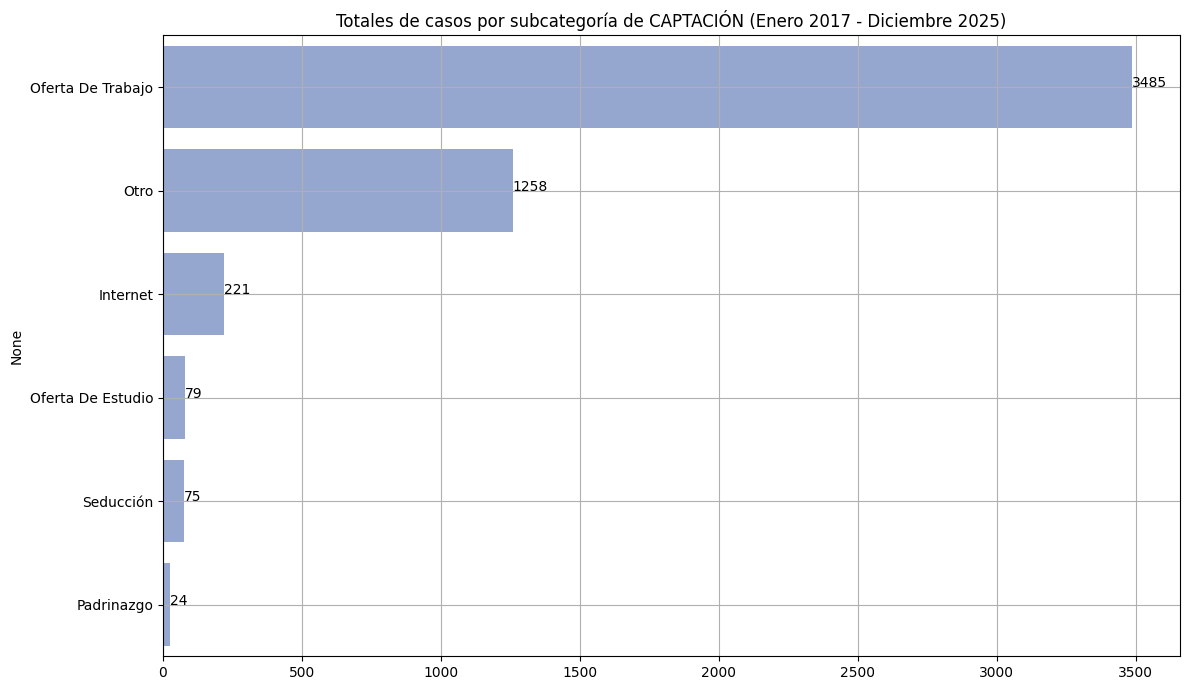

In [19]:
#Graficamos
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_cap.values, y =sub_cap.index, color = "#8ca3d9")
for i, v in enumerate(sub_cap.values):
    plt.text(v, i, str(int(v)))

plt.title("Totales de casos por subcategoría de CAPTACIÓN (Enero 2017 - Diciembre 2025)")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Subcategoria_captacion.png")
plt.show()

## 2. Destino del hecho 🚓

In [45]:
sub_dest_cols = [
    col 
    for col in  df_wide.columns
    if col.startswith("DESTINO_DEL_HECHO_D_") and "TOTAL" not in col
]

sub_dest = df_wide[sub_dest_cols].sum().sort_values(ascending = False)
print(f'Subcategoría DESTINO DEL HECHO:\n{sub_dest}') 

Subcategoría DESTINO DEL HECHO:
DESTINO_DEL_HECHO_D_FISCALIA                      2649
DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION     550
DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES              233
DESTINO_DEL_HECHO_D_OTRO                           221
DESTINO_DEL_HECHO_D_COMISARIA                      188
DESTINO_DEL_HECHO_D_JUEZ                            85
DESTINO_DEL_HECHO_D_DESISTIMIENTO                    2
dtype: int64


### 2.1. Limpieza de nombres🧹

In [47]:
sub_dest.index = sub_dest.index.str.replace("DESTINO_DEL_HECHO_D_", "").str.title().str.replace("_", " ")
sub_dest= sub_dest.rename(index = {"Fiscalia": "Fiscalía", "Pendiente De Investigacion" : "Pendiente De Investigación", "Comisaria" : "Comisaría"})
print(f'Cantidad total de casos: {sub_dest.sum()}')
print('-' * 40)
print(sub_dest)

Cantidad total de casos: 3928
----------------------------------------
Fiscalía                      2649
Pendiente De Investigación     550
Otras Autoridades              233
Otro                           221
Comisaría                      188
Juez                            85
Desistimiento                    2
dtype: int64


## 2.2. Gráfica de las subcategorías de DESTINO DEL HECHO desde Enero del 2017 hasta Septiembre del 2025📈

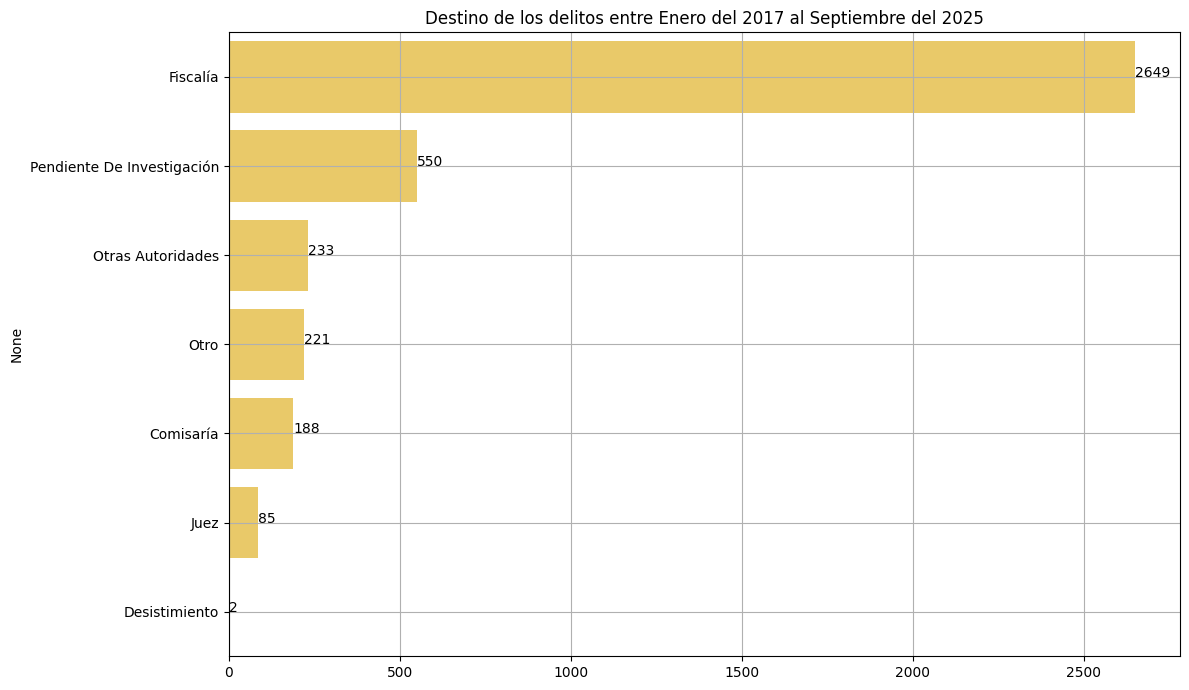

In [18]:
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_dest.values, y=sub_dest.index, color = "#ffd453")
for i, v in enumerate(sub_dest.values):
    plt.text(v, i, str(int(v)))

plt.title("Destino de los delitos entre Enero del 2017 al Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Subcategoria_Destino_del_hecho.png")
plt.show()

## 3. Género femenino por grupo de edades🙍‍♀️

In [ ]:
sub_fem_cols = [
    col 
    for col in df_wide.columns
    if col.startswith("FEMENINO_GRUPO_EDAD_EF_DE_") and "SUB_TOTAL" not in col
]
sub_fem = df_wide[sub_fem_cols].sum().sort_values(ascending=False)
print(f"Mujeres víctimas de el delito de trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_fem}")

Mujeres víctimas de el delito de trata de personas entre Enero del 2017 y Septiembre del 2025:
FEMENINO_GRUPO_EDAD_EF_DE_18_A_29_AÑOS    2183
FEMENINO_GRUPO_EDAD_EF_DE_12_A_17_AÑOS    1218
FEMENINO_GRUPO_EDAD_EF_DE_30_A_59_AÑOS     368
FEMENINO_GRUPO_EDAD_EF_DE_6_A_11_AÑOS       93
FEMENINO_GRUPO_EDAD_EF_DE_0_A_5_AÑOS        32
FEMENINO_GRUPO_EDAD_EF_DE_60_A_MAS           4
dtype: int64


### 3.1. Limpieza de los nombres🧹

In [ ]:
sub_fem.index = sub_fem.index.str.replace("FEMENINO_GRUPO_EDAD_EF_DE_", "").str.replace("_", " ").str.upper()
sub_fem = sub_fem.rename(index = {"60 A MAS" : "60 A MÁS"})
print(f'Cantidad total de casos: {sub_fem.sum()}')
print('-' * 40)
print(f"Columnas renombradas:\n{sub_fem}")

Cantidad total de casos: 3898
----------------------------------------
Columnas renombradas:
18 A 29 AÑOS    2183
12 A 17 AÑOS    1218
30 A 59 AÑOS     368
6 A 11 AÑOS       93
0 A 5 AÑOS        32
60 A MÁS           4
dtype: int64


### 3.1. Graficamos la cantidad de mujeres víctimas del delito de trata de personas por grupos de edad📈

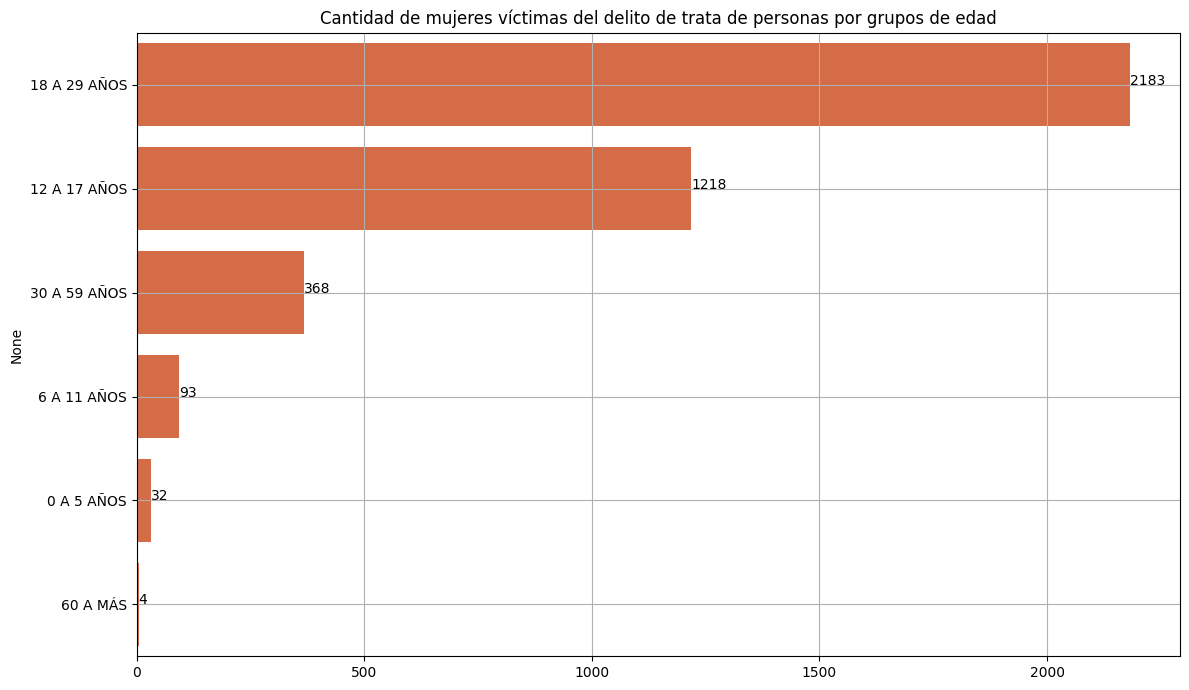

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_fem.values, y=sub_fem.index, color = "#eb612f")
for i, v in enumerate(sub_fem.values):
    plt.text(v, i, str(int(v)))

plt.title("Cantidad de mujeres víctimas del delito de trata de personas por grupos de edad")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Mujeres_victimas_trata_personas.png")
plt.show()

### 4. Género masculino por grupo de edades🙍‍♂️

In [33]:
sub_masc_cols = [
    col
    for col in df_wide.columns
    if col.startswith("MASCULINO_GRUPO_DE_EDAD_EM_DE_") and "SUB_TOTAL" not in col
]
sub_masc = df_wide[sub_masc_cols].sum().sort_values(ascending=False)
print(f"Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_masc}")

Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:
MASCULINO_GRUPO_DE_EDAD_EM_DE_18_A_29_AÑOS    201
MASCULINO_GRUPO_DE_EDAD_EM_DE_12_A_17_AÑOS    159
MASCULINO_GRUPO_DE_EDAD_EM_DE_30_A_59_AÑOS     90
MASCULINO_GRUPO_DE_EDAD_EM_DE_6_A_11_AÑOS      40
MASCULINO_GRUPO_DE_EDAD_EM_DE_0_A_5_AÑOS       25
MASCULINO_GRUPO_DE_EDAD_EM_DE_60_A_MAS          4
dtype: int64


### 4.1. Limpieza en los nombres🧹

In [39]:
sub_masc.index = sub_masc.index.str.replace("MASCULINO_GRUPO_DE_EDAD_EM_DE_", "").str.replace("_", " ").str.replace("60 A MAS", "60 A MÁS")
print(f'Cantidad total de casos: {sub_masc.sum()}')
print('-' * 95)
print(f"Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:\n {sub_masc}") 

Cantidad total de casos: 519
-----------------------------------------------------------------------------------------------
Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:
 18 A 29 AÑOS    201
12 A 17 AÑOS    159
30 A 59 AÑOS     90
6 A 11 AÑOS      40
0 A 5 AÑOS       25
60 A MÁS          4
dtype: int64


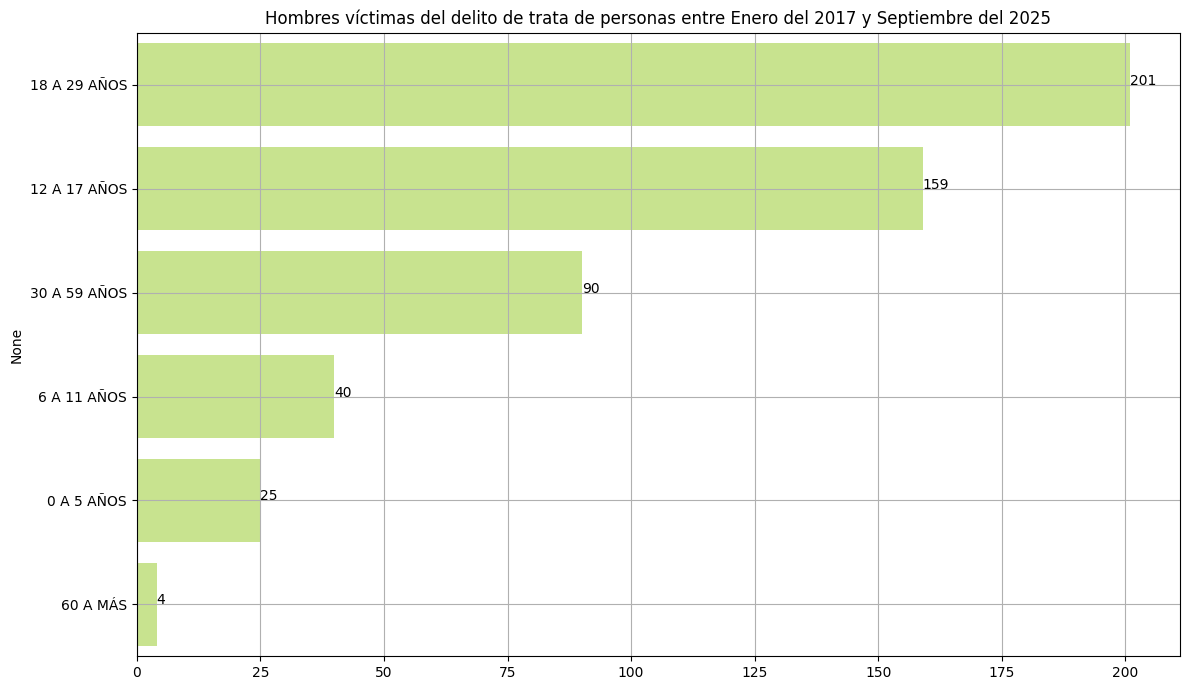

In [16]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_masc.values, y=sub_masc.index, color = "#cdf181")
for i, v in enumerate(sub_masc.values):
    plt.text(v, i, str(int(v)))

plt.title("Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Hombres_victimas_del_delito_trata_personas.png")
plt.show()

## 5. Finalidad del tipo de delito🔍

In [28]:
sub_final_cols = [
    col 
    for col in df_wide.columns
    if col.startswith("FINALIDAD_DEL_TIPO_DE_DELITO_F1_") and "TOTAL" not in col
]
sub_final = df_wide[sub_final_cols].sum().sort_values(ascending=False)
print(f'Finalidad del tipo de delito entre Enero del 2017 y Septiembre del 2025:\n{sub_final}')

Finalidad del tipo de delito entre Enero del 2017 y Septiembre del 2025:
FINALIDAD_DEL_TIPO_DE_DELITO_F1_EXPLOTACION_SEXUAL                  2877
FINALIDAD_DEL_TIPO_DE_DELITO_F1_EXPLOTACION_LABORAL                 1054
FINALIDAD_DEL_TIPO_DE_DELITO_F1_NO_IDENTIFICADO                      962
FINALIDAD_DEL_TIPO_DE_DELITO_F1_TRABAJOS_Y_SERVICIOS_FORZADOS        108
FINALIDAD_DEL_TIPO_DE_DELITO_F1_MENDICIDAD                           100
FINALIDAD_DEL_TIPO_DE_DELITO_F1_VENTA_DE_NIÑOS                        36
FINALIDAD_DEL_TIPO_DE_DELITO_F1_TRAFICO_DE_ORGANOS_TEJIDO_HUMANO       5
dtype: int64


### 5.1. Limpieza de nombres🧹

In [31]:
sub_final.index = sub_final.index.str.replace("FINALIDAD_DEL_TIPO_DE_DELITO_F1_", "").str.replace("_", " ")
sub_final = sub_final.rename(index={"EXPLOTACION SEXUAL" : "EXPLOTACIÓN SEXUAL", "EXPLOTACION LABORAL" : "EXPLOTACIÓN LABORAL", "TRAFICO DE ORGANOS TEJIDO HUMANO" : "TRÁFICO DE ÓRGANOS TEJIDO HUMANO"})
sub_final.index = sub_final.index.str.capitalize()
print(f'Cantidad total de casos: {sub_final.sum()}')
print('-' * 40)
print(sub_final)

Cantidad total de casos: 5142
----------------------------------------
Explotación sexual                  2877
Explotación laboral                 1054
No identificado                      962
Trabajos y servicios forzados        108
Mendicidad                           100
Venta de niños                        36
Tráfico de órganos tejido humano       5
dtype: int64


## 5.2. Grafícamos cual ha sido el tipo de delito que se clasifican como trata de personas que más se ha cometido entre Enero del 2027 y Septiembre del 2025 📶

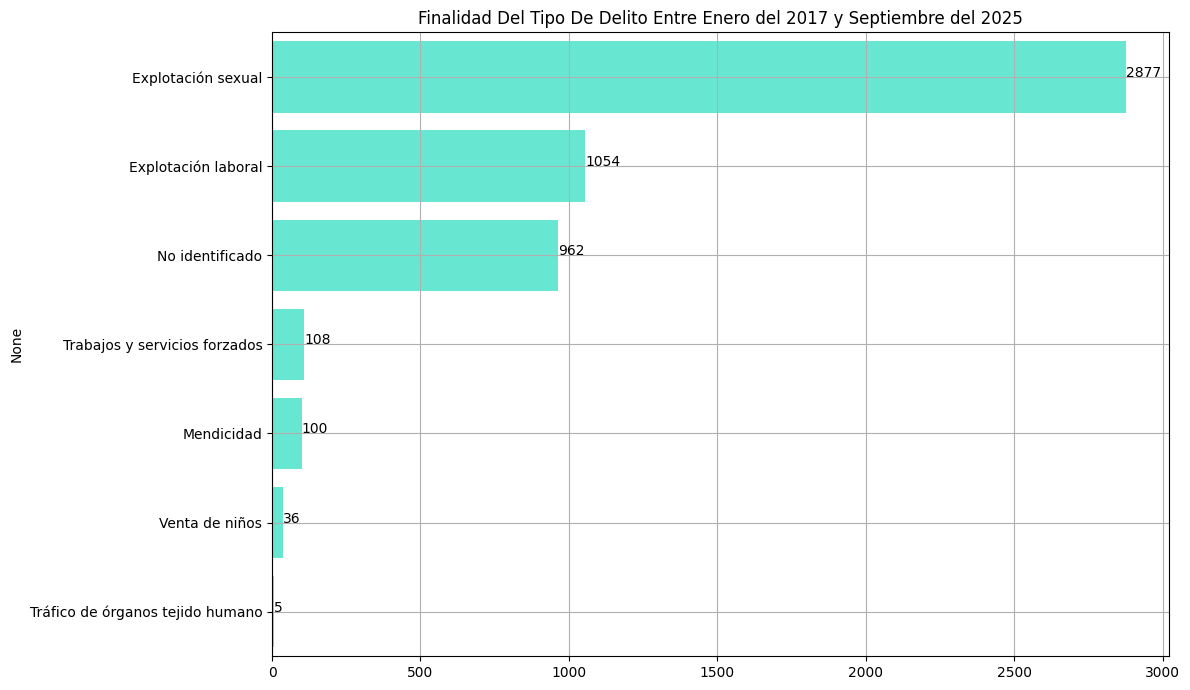

In [22]:
plt.figure(figsize= (12, 7))
sns.barplot(x=sub_final.values, y=sub_final.index, color = "#52fbdf")
for i, v in enumerate(sub_final.values):
    plt.text(v, i, str(int(v)))

plt.title("Finalidad Del Tipo De Delito Entre Enero del 2017 y Septiembre del 2025")
plt.grid(True)
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Finalidad_tipo_delito.png")
plt.show()

## 6. Medio empleado por el tratante🔍

In [23]:
sub_medio_cols = [
    col
    for col in df_wide.columns
    if col.startswith("MEDIO_EMPLEADO_POR_EL_TRATANTE_M_") and "TOTAL" not in col
]
sub_medio = df_wide[sub_medio_cols].sum().sort_values(ascending=False)
print(f"Medio empleado por el tratante para cometer el delito:\n{sub_medio}")

Medio empleado por el tratante para cometer el delito:
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_ENGAÑO                            3016
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_OTRO__ESPECIFICAR                 1050
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_CONCESION_O_RECEPCION_DE_PAGOS     436
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_AMENAZA                            338
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_PRIVACION_DE_LA_LIBERTAD           138
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_VIOLENCIA                           75
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_ABUSO_DE_PODER                      50
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_FRAUDE                              39
dtype: int64


### 6.1. Limpieza de nombres🧹

In [26]:
sub_medio.index = sub_medio.index.str.replace("MEDIO_EMPLEADO_POR_EL_TRATANTE_M_", "").str.replace("__", " ").str.replace("_", " ")
sub_medio = sub_medio.rename(index={"PRIVACION DE LA LIBERTAD" : "PRIVACIÓN DE LA LIBERTAD", "CONCESION O RECEPCION DE PAGOS" : "CONCESIÓN O RECEPCION DE PAGOS", "OTRO ESPECIFICAR" : "OTRO"})
sub_medio.index = sub_medio.index.str.capitalize()
print(f'Total de casos: {sub_medio.sum()}')
print('-' * 40)
print(sub_medio)

Total de casos: 5142
----------------------------------------
Engaño                            3016
Otro                              1050
Concesión o recepcion de pagos     436
Amenaza                            338
Privación de la libertad           138
Violencia                           75
Abuso de poder                      50
Fraude                              39
dtype: int64


### 6.2. Graficamos la cantidad de casos por cada tipo de medio empleado por el tratante entre Enero del 2017 y Septimbre del 2025📈

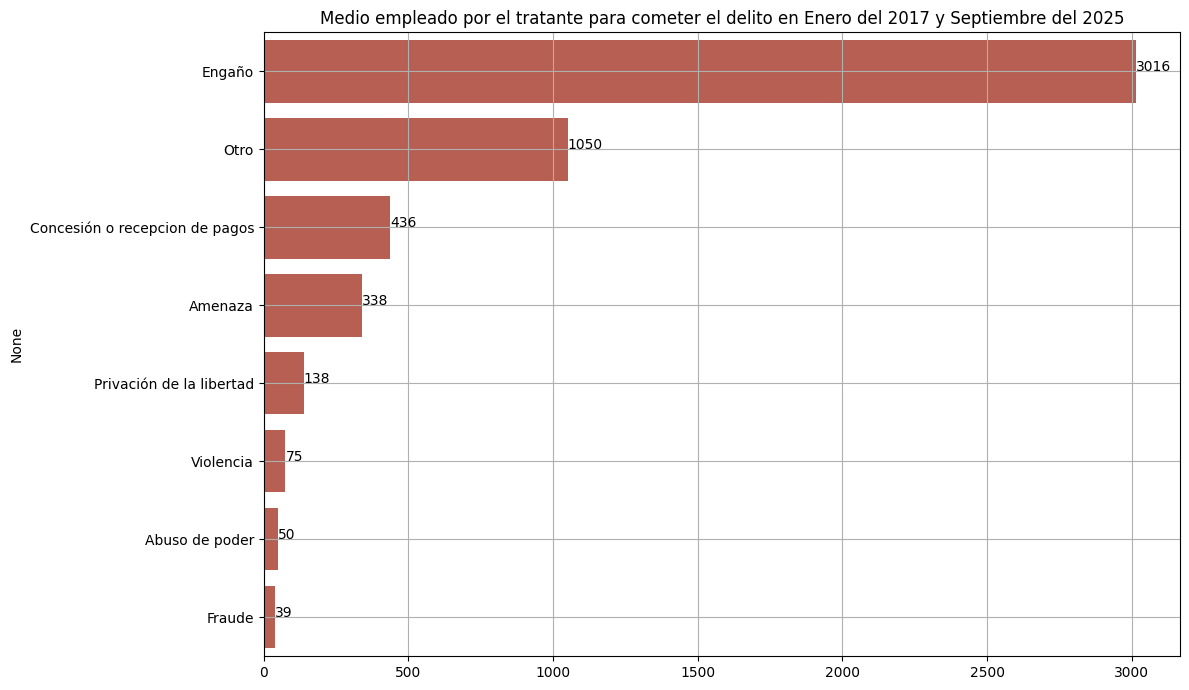

In [25]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_medio.values, y=sub_medio.index, color="#c75341")
for i, v in enumerate(sub_medio.values):
    plt.text(v, i, str(int(v)))

plt.title("Medio empleado por el tratante para cometer el delito en Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Medio_empleado_por_el_tratante.png")
plt.show()

## 7. Vínculo con el tratante 🔍

In [14]:
sub_vinc_trat_cols = [
    col
    for col in df_wide.columns
    if col.startswith("VINCULO_CON_EL_TRATANTE_P4_") and "TOTAL" not in col
]

sub_vinc_trat = df_wide[sub_vinc_trat_cols].sum().sort_values(ascending=False)
print(f"Vínculo que se tienen las víctimas con el tratante entre Enero del 2017 y Septiembre del 2025:\n{sub_vinc_trat}")

Vínculo que se tienen las víctimas con el tratante entre Enero del 2017 y Septiembre del 2025:
VINCULO_CON_EL_TRATANTE_P4_OTRO__ESPECIFICAR    4300
VINCULO_CON_EL_TRATANTE_P4_CONOCIDO              665
VINCULO_CON_EL_TRATANTE_P4_FAMILIAR              147
VINCULO_CON_EL_TRATANTE_P4_TUTOR                  19
VINCULO_CON_EL_TRATANTE_P4_CONYUGE                11
dtype: int64


### 7.1. Limpieza de nombres🧹

In [16]:
sub_vinc_trat.index = sub_vinc_trat.index.str.replace("VINCULO_CON_EL_TRATANTE_P4_", " ").str.replace("__", " ").str.replace("_", " ").str.strip().str.capitalize()
sub_vinc_trat = sub_vinc_trat.rename(index={"OTRO ESPECIFICAR": "OTRO"})
print(f'Total de casos: {sub_vinc_trat.sum()}')
print('-' * 40)
print(sub_vinc_trat)

Total de casos: 5142
----------------------------------------
Otro especificar    4300
Conocido             665
Familiar             147
Tutor                 19
Conyuge               11
dtype: int64


### 7.2. Graficamos todos los casos de vínculos de la víctima con el tratante📶

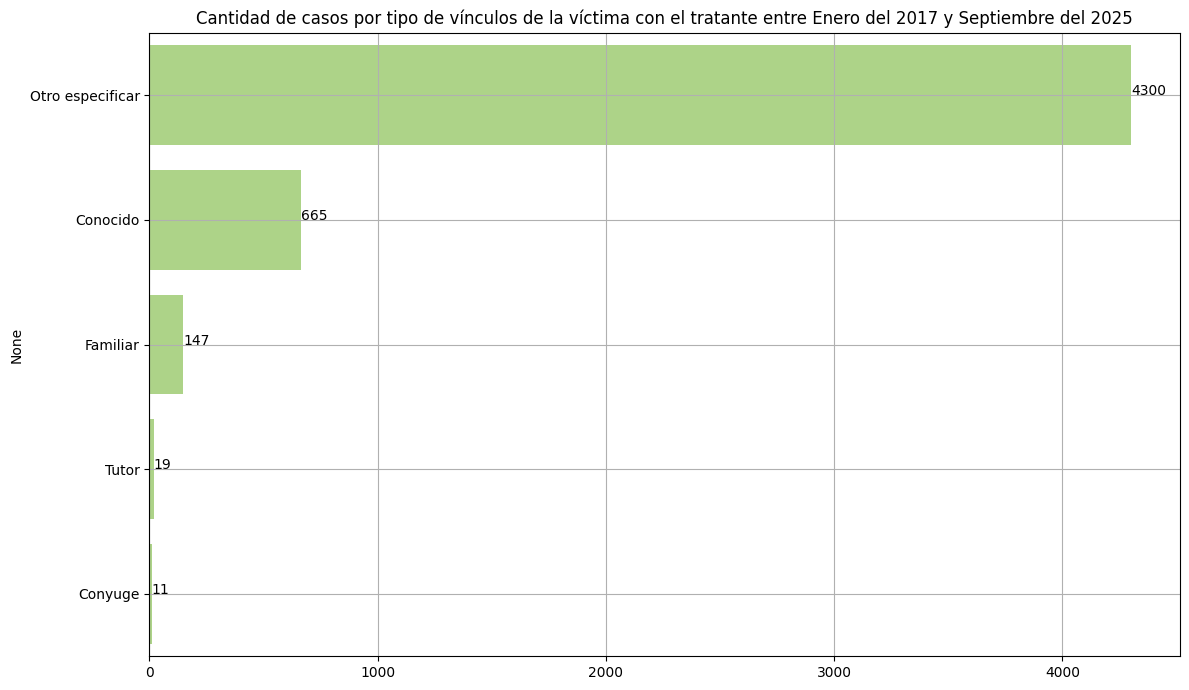

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_vinc_trat.values, y=sub_vinc_trat.index, color = "#addf7c")
for i, v in enumerate(sub_vinc_trat.values):
    plt.text(v, i, str(int(v)))

plt.title("Cantidad de casos por tipo de vínculos de la víctima con el tratante entre Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Vinculo_de_la_victima_con_el_tratante.png")
plt.show()

## 8. Explotación

In [8]:
sub_explotacion_cols = [
    col
    for col in df_wide.columns
    if col.startswith("EXPLOTACION_F2_") and "TOTAL" not in col
]
sub_explotacion = df_wide[sub_explotacion_cols].sum().sort_values(ascending=False)
print(f'Cantidad de por tipo de explotación entre Enero del 2017 y Septiembre del 2025:\n{sub_explotacion}')

Cantidad de por tipo de explotación entre Enero del 2017 y Septiembre del 2025:
EXPLOTACION_F2_OTRO_ESPECIFICAR                       3444
EXPLOTACION_F2_PROSTIBULO                              294
EXPLOTACION_F2_NIGHT_CLUB                              290
EXPLOTACION_F2_MENDICIDAD__VIA_PUBLICA                 101
EXPLOTACION_F2_SERVICIO_DOMESTICO                       79
EXPLOTACION_F2_DISCOTECA                                52
EXPLOTACION_F2_TRABAJO_EN_MERCADOS                      50
EXPLOTACION_F2_MINERIA_ARTESANAL                        21
EXPLOTACION_F2_CENTRO_DE_MASAJES                        15
EXPLOTACION_F2_ACTIVIDAD_AGROPECUARIA                   13
EXPLOTACION_F2_FABRICA_ARTESANAL_DE_LADRILOS             6
EXPLOTACION_F2_CENTRO_DE_PRODUCCION_DE_PORNOGRAFIA       6
EXPLOTACION_F2_ALBAÑILERIA                               4
EXPLOTACION_F2_ESTUDIO_DE_MODELAJE                       4
EXPLOTACION_F2_ACTIVIDAD_PESQUERA                        3
EXPLOTACION_F2_TALA_ILEGAL_DE_LA_MA

### 8.1. Limpieza de nombres🧹

In [12]:
sub_explotacion.index = sub_explotacion.index.str.strip().str.replace("EXPLOTACION_F2_", " ").str.replace("__", " ").str.replace("_", " ")
sub_explotacion = sub_explotacion.rename(
    index={
        "PROSTIBULO" : "PROSTÍBULO",
        "MENDICIDAD VIA PUBLICA" : "MENDICIDAD VÍA PÚBLICA",
        "SERVICIO_DOMESTICO" : "SERVICIO DOMÉSTICO",
        "MINERIA ARTESANAL" : "MINERÍA ARTESANAL",
        "FABRICA ARTESANAL DE LADRILOS": "FÁBRICA ARTESANAL DE LADRILLOS",
        "CENTRO DE PRODUCCION DE PORNOGRAFIA" : "CENTRO DE PRODUCCIÓN DE PORNOGRAFÍA",
        "ALBAÑILERIA" : "ALBAÑILERÍA",
        "TALLERES PIROTECNICOS" : "TALLERES PIROTÉCNICOS",
        "SEGREGACION DE BASURA" : "SEGREGACIÓN DE BASURA",
        "OTRO ESPECIFICAR" : "OTRO"     
        }
    )
sub_explotacion.index = sub_explotacion.index.str.capitalize()
print(f'Total de casos: {sub_explotacion.sum()}')
print('-' * 45)
print(sub_explotacion)

Total de casos: 4385
---------------------------------------------
Otro especificar                       3444
Prostibulo                              294
Night club                              290
Mendicidad via publica                  101
Servicio domestico                       79
Discoteca                                52
Trabajo en mercados                      50
Mineria artesanal                        21
Centro de masajes                        15
Actividad agropecuaria                   13
Fabrica artesanal de ladrilos             6
Centro de produccion de pornografia       6
Albañileria                               4
Estudio de modelaje                       4
Actividad pesquera                        3
Tala ilegal de la madera                  2
Talleres pirotecnicos                     1
Estibadores                               0
Segregacion de basura                     0
dtype: int64


### 8.2. Gráficamos el total de casos por tipo de explotación entre Enero del 2017 Y Septiembre del 2025📶

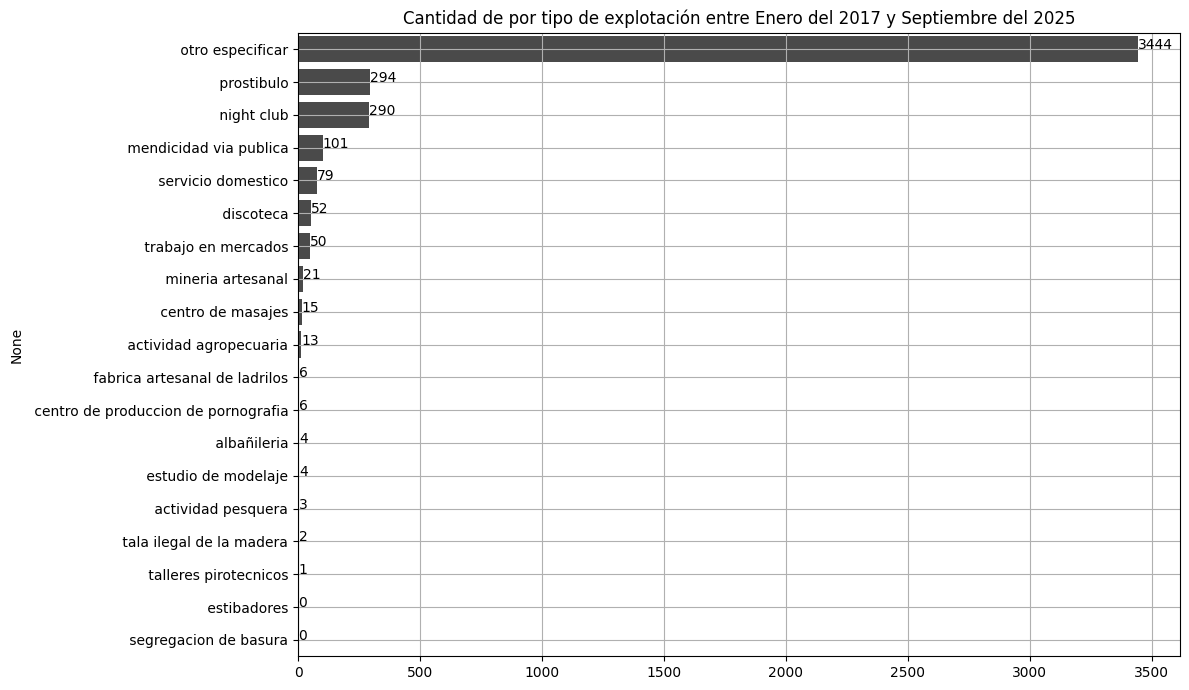

In [32]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_explotacion.values, y=sub_explotacion.index, color = "#4A4A4A")
for i, v in enumerate(sub_explotacion.values):
    plt.text(v, i, str(int(v)))

plt.title("Cantidad de por tipo de explotación entre Enero del 2017 y Septiembre del 2025")
plt.grid(True)
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Victimas_de_explotacion.png")
plt.show()

## 9. Tipo de reclutamiento🚌

In [3]:
sub_tip_recl_cols = [
    col
    for col in df_wide.columns
    if col.startswith("TIPO_RECLUTAMIENTO_T_") and "TOTAL" not in col
]
sub_tip_recl = df_wide[sub_tip_recl_cols].sum().sort_values(ascending=True)
print(f"Tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_tip_recl}")

Tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025:
TIPO_RECLUTAMIENTO_T_INTERNACIONAL    1306
TIPO_RECLUTAMIENTO_T_NACIONAL         3759
dtype: int64


### 9.1. Limpieza de columnas🧹

In [6]:
sub_tip_recl.index = sub_tip_recl.index.str.replace("TIPO_RECLUTAMIENTO_T_", " ")
print(f'Total casos: {sub_tip_recl.sum()}')
print('-' * 25)
print(sub_tip_recl)

Total casos: 5065
-------------------------
INTERNACIONAL    1306
NACIONAL         3759
dtype: int64


## 9.2. Graficamos el tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025📶

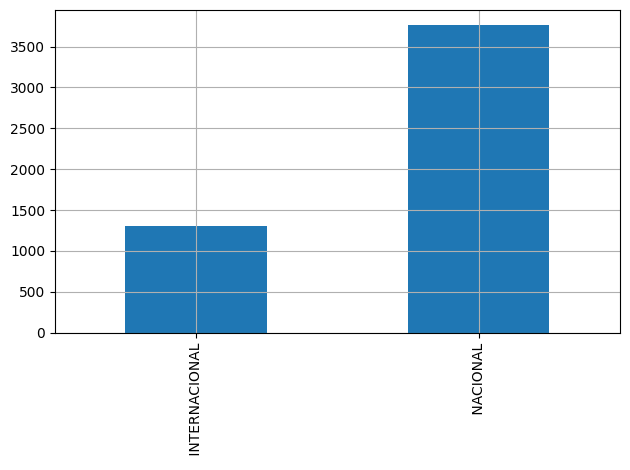

In [35]:
sub_tip_recl.plot(kind = "bar")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/Analisis_categoria_subcategoria/Tipo_de_reclutamiento.png")
plt.show()